In [1]:
import kidcalc
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
### General parameters
V = 10.**3 # um^3
kbTc = 100.8 #ueV
D0 = 1.76*kbTc #ueV
kbT = D0/10 #ueV
kbTD = 37312. #ueV
N0 = 1.74*10**4 #ueV^-1 um^-3
Vsc = .1655/1.74*10**-4 #ueV um^3, so that 1/N0*Vsc = 6.12, from 2.2
t0 = 440 #ns
tesc = .17 #ns
tpb = .11 #ns
ak = .28 #arb.
d = .06 #um
lbd0 = .092 #um
hw = D0/10 #ueV
hw0 = 26.74 #2pi*GHz (To match MW,hw)
Qc = 2*10**4 #arb.

In [3]:
#### Calculate N_qp evolution
def rateeq(N,t,params):
    N_qp, N_w = N
    R, V, G_B, G_es, N_w0 = params
    derivs = [-R*N_qp**2/V + 2*G_B*N_w, 
             R*N_qp**2/(2*V) - G_B*N_w - G_es*(N_w - N_w0)]
    return derivs

# Parameters
R = (2*D0/kbTc)**3/(2*D0*N0*t0) # ns^-1*um^3 (From Wilson2004 or 2.29)
G_B = 1/tpb # ns^-1 (From chap8)
G_es = 1/tesc  # ns^-1 (From chap8)

N_qp0 = V*kidcalc.nqp(kbT,kidcalc.D(kbT,N0,Vsc,kbTD),N0)
N_w0 = R*N_qp0**2*tpb/(2*V) # arb. 

# Phonon trapping
# Fw = 1 + G_B/G_es
# R = 2*Fw**-1*R

params = [R, V, G_B, G_es, N_w0]

# Initial values
N_qp = N_qp0*10**1 #arb.
N_w = N_w0 #arb.
N_0 = [N_qp, N_w]

# Time array
tStop = 8*10**9. # ns
tInc = 10**8. # ns
t = np.arange(0., tStop, tInc)

psoln = odeint(rateeq, N_0, t, args=(params,))

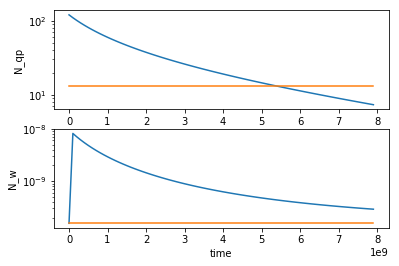

In [4]:
fig = plt.figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, psoln[:,0]-N_qp0)
ax1.set_xlabel('time')
ax1.set_ylabel('N_qp')
ax1.set_yscale('log')

ax2 = fig.add_subplot(212)
ax2.plot(t, psoln[:,1])
ax2.plot(t,np.ones(np.size(t))*N_w0)
ax2.set_xlabel('time')
ax2.set_ylabel('N_w')
ax2.set_yscale('log')

plt.show()
# print('N_qp saturated = {:e}'.format(psoln[-1,0]))

### Calculate the (A,theta) response for every N_qp

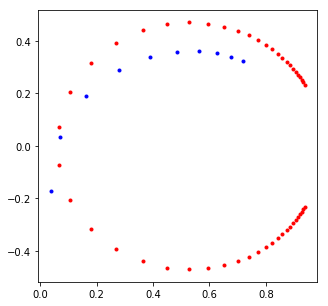

In [5]:
D_0 = kidcalc.D(kbT,N0,Vsc,kbTD)
s1_0,s2_0 = kidcalc.cinduct(hw,D_0,kbT)
hwres_0 = kidcalc.hwres(s2_0,hw0,hw,ak,lbd0,d,D_0,D0,kbT)
Qi_0 = kidcalc.Qi(s1_0,s2_0,ak,lbd0,d,D_0,D0,kbT)

plt.figure(figsize = (5,5))
for dhw in np.linspace(-hw0*10**-4,hw0*10**-4):
    S21_0 = kidcalc.S21(Qi_0,Qc,hwres_0,dhw,hwres_0)
    plt.plot(np.real(S21_0),np.imag(S21_0),'r.')

for N_qp in np.linspace(N_qp0*.1,N_qp0*10,10):
    kbTeff = kidcalc.kbTeff(N_qp,N0,V,Vsc,kbTD,kbTc)
    D = kidcalc.D(kbTeff,N0,Vsc,kbTD)
    s1,s2 = kidcalc.cinduct(hw,D,kbTeff)
    Qi = kidcalc.Qi(s1,s2,ak,lbd0,d,D,D0,kbT)
    hwres = kidcalc.hwres(s2,hw0,hw,ak,lbd0,d,D,D0,kbT)
    S21 = kidcalc.S21(Qi,Qc,hwres_0,0,hwres)
    plt.plot(np.real(S21),np.imag(S21),'.b')

In [6]:
N_qp0

13.3057170857062

In [8]:
Vsc

9.511494252873564e-06